# About the Data - Diabetes Dataset from 130 US hospitals, 1999-2008
Data From: UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#

Abstract: This data has been prepared to analyze \factors related to readmission as well as other outcomes pertaining to patients with diabetes.

Source: The data are submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).

Data Set Information: The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1) It is an inpatient encounter (a hospital admission).
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
(3) The length of stay was at least 1 day and at most 14 days.
(4) Laboratory tests were performed during the encounter.
(5) Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [1]:
### Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ignore Warnings
import warnings
warnings.simplefilter('ignore')

### Set Display Options
from IPython.display import Image
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth",0)

In [2]:
data_dictionary_clean = pd.read_csv("Resources/data_dictionary_clean.csv")
data_dictionary_clean.head()

,Feature,Data_Label,Data_Description,Data_Type
0,y,readmit,Recoded - Readmit (yes = 1/no),dichotomous/binary
1,y,readmit_<30_days,Recoded - less than 30 days (yes=1/no),dichotomous/binary
2,x,race_?,Race/Ethnicity,dichotomous/binary
3,x,race_AfricanAmerican,Race/Ethnicity,dichotomous/binary
4,x,race_Asian,Race/Ethnicity,dichotomous/binary


In [3]:
### Read Diabetes Data (ETL notebook csv export)
diabetes_df_clean = pd.read_csv("Resources/diabetic_data.csv")
diabetes_df_clean.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes_df_clean.shape

(101766, 50)

In [5]:
diabetes_df_clean.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
diabetes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
diabetes_df_clean.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
#Showing missing data (?)
for col in diabetes_df_clean.columns:
    if diabetes_df_clean[col].dtype == object:
         print(col,diabetes_df_clean[col][diabetes_df_clean[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [199]:
#Dropping data with large proportion of the result are missing = (?)
diabetes_df_clean = diabetes_df_clean.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [9]:
#Looking for missing values in gender data

       
print('gender', diabetes_df_clean['gender'][diabetes_df_clean['gender'] == 'Unknown/Invalid'].count())   


gender 3


In [201]:
# code age intervals
for i in range(0,10):
    diabetes_df_clean['age'] = diabetes_df_clean['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
diabetes_df_clean['age'].value_counts()

8     26068
7     22483
6     17256
9     17197
5     9685 
4     3775 
10    2793 
3     1657 
2     691  
1     161  
Name: age, dtype: int64

In [202]:
#dropping the medication with the same value i
diabetes_df_clean = diabetes_df_clean.drop(['citoglipton', 'examide'], axis = 1)
diabetes_df_clean['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [16]:
diabetes_df_clean['readmitted'] = diabetes_df_clean['readmitted'].replace('>30', 1)
diabetes_df_clean['readmitted'] = diabetes_df_clean['readmitted'].replace('<30', 1)
diabetes_df_clean['readmitted'] = diabetes_df_clean['readmitted'].replace('NO', 0)

In [17]:
diabetes_df_clean['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

In [18]:
medicines = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
            'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
            'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
            'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in medicines:
    colname = str(col) + 'temp'
    diabetes_df_clean[colname] = diabetes_df_clean[col].apply(lambda x: 0 if (x == 'No' or x == 'Controlled') else 1)
diabetes_df_clean['numchange'] = 0
for col in medicines:
    colname = str(col) + 'temp'
    diabetes_df_clean['numchange'] = diabetes_df_clean['numchange'] + diabetes_df_clean[colname]
    del diabetes_df_clean[colname]
    
diabetes_df_clean['numchange'].value_counts()  

21    101766
Name: numchange, dtype: int64

In [19]:
#Labelling the data
diabetes_df_clean['change'] = diabetes_df_clean['change'].replace('Change', 1)
diabetes_df_clean['change'] = diabetes_df_clean['change'].replace('No', 0)
diabetes_df_clean['gender'] = diabetes_df_clean['gender'].replace('Male', 1)
diabetes_df_clean['gender'] = diabetes_df_clean['gender'].replace('Female', 0)
diabetes_df_clean['diabetesMed'] = diabetes_df_clean['diabetesMed'].replace('Yes', 1)
diabetes_df_clean['diabetesMed'] = diabetes_df_clean['diabetesMed'].replace('No', 0)

for col in medicines:
    diabetes_df_clean[col] = diabetes_df_clean[col].replace('No', 0)
    diabetes_df_clean[col] = diabetes_df_clean[col].replace('Controlled', 1)
    diabetes_df_clean[col] = diabetes_df_clean[col].replace('Up', 1)
    diabetes_df_clean[col] = diabetes_df_clean[col].replace('Down', 1)


In [20]:
keep = diabetes_df_clean.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
keep.shape


(71518, 51)

In [21]:
keep.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,0,0,1,1
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


Text(0.5, 1.0, 'Readmission Result')

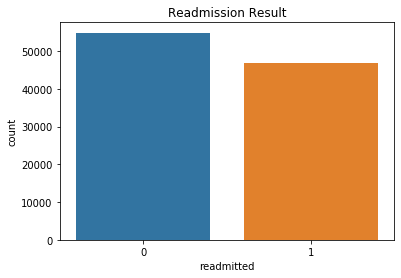

In [22]:
# Readmission 
sns.countplot(diabetes_df_clean['readmitted']).set_title('Readmission Result')

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

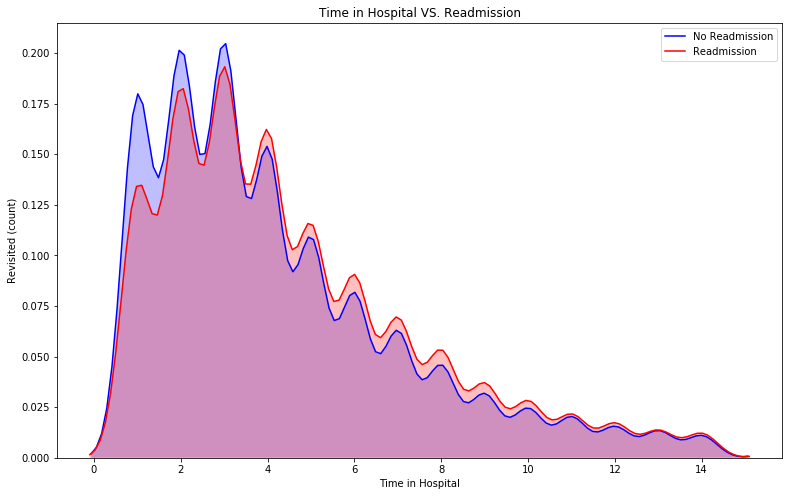

In [23]:
fig = plt.figure(figsize=(13,8),)
ax=sns.kdeplot(diabetes_df_clean.loc[(diabetes_df_clean['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='No Readmission')
ax=sns.kdeplot(diabetes_df_clean.loc[(diabetes_df_clean['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmission')
ax.set(xlabel='Time in Hospital', ylabel='Revisited (count)')
plt.title('Time in Hospital VS. Readmission')

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

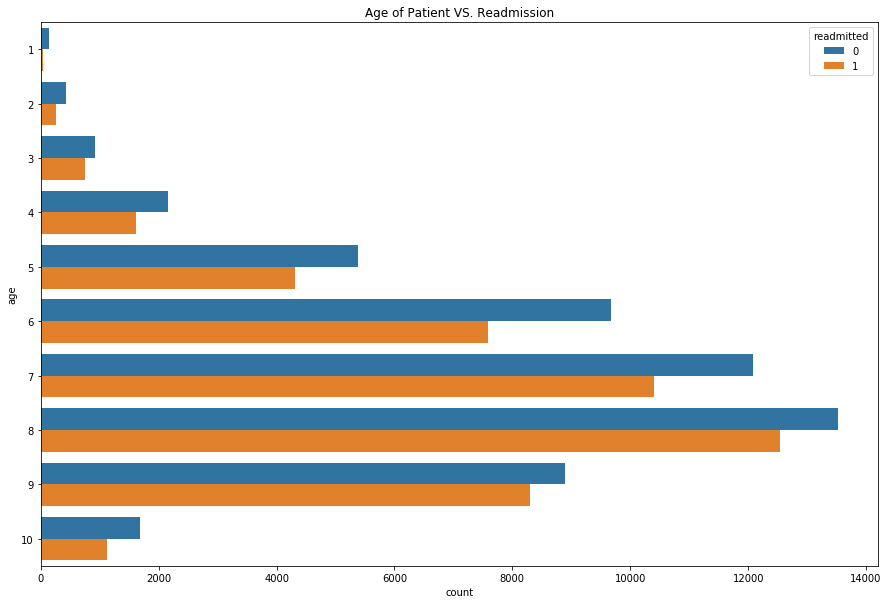

In [211]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= diabetes_df_clean['age'], hue = diabetes_df_clean['readmitted']).set_title('Age of Patient VS. Readmission')


Text(0.5, 1.0, 'Number of medication used VS. Readmission')

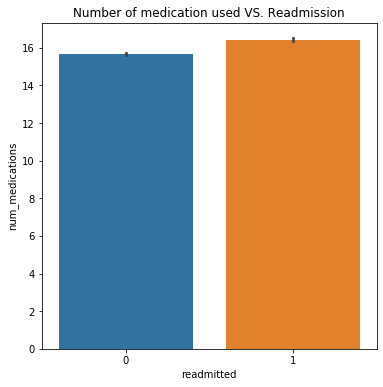

In [212]:
fig = plt.figure(figsize=(6,6))
sns.barplot(x = diabetes_df_clean['readmitted'], y = diabetes_df_clean['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Gender VS. Readmission')

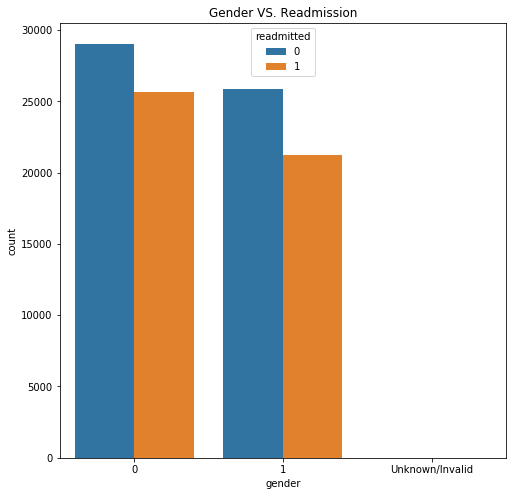

In [213]:
# Male = 1, female = 0
fig = plt.figure(figsize=(8,8))
sns.countplot(diabetes_df_clean['gender'], hue = diabetes_df_clean['readmitted']).set_title("Gender VS. Readmission")


Text(0.5, 1.0, 'Prescribe Medicine VS Readmission')

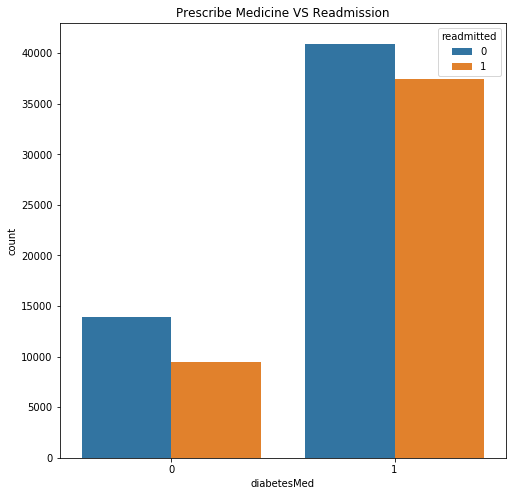

In [214]:
fig = plt.figure(figsize=(8,8))
sns.countplot(diabetes_df_clean['diabetesMed'], hue = diabetes_df_clean['readmitted']).set_title('Prescribe Medicine VS Readmission')